# Lab 6: Overview Learning & Classification
In this lab, we will first look at a particular example of a loss function and how it enables us to learn. This should sensitize you that the target you choose changes what you learn.
Subsequently we will walk through some popular machine learning paradigms introduced from a classification (which usually is associated with supervised learning though) stand point, detailing how we can learn things with varying information sources. Since we start out looking from the classification perspective, we subsequently deep dive into classification.


# (A) Overview Learning
This part is devided into two sections, namely loss functions and learning paradigms. While the former shall sensitize you to the question of how you measure your
model's performance and how you thereby steer your optimization process, the latter shall sensitize you to the question of how you can learn from your data.
When looking at the learning paradigms, keep track of how you learn from the data; specifically, look at if and how you use labels.

## Loss functions
A loss function is a mathematical function that measures how well a machine learning model is performing on a given task. The goal of a machine learning model is to minimize the loss function, which means finding the set of model parameters that produces the smallest possible loss value.

The choice of loss function depends on the problem being solved and the preferences of the user. For example, if the task is **regression** (predicting a continuous value), the mean squared error (MSE) loss function may be used, which penalizes larger prediction errors more heavily than smaller errors. On the other hand, if the task is **classification** (predicting a categorical value), the cross-entropy loss function may be used, which measures the _dissimilarity_ between the predicted and true probability distributions.

The loss function is a critical component of a machine learning model because it tells the optimization procedure exactly how wrong a prediction is and **how strongly it should be penalized**. It thereby can easily be adapted to **encode the user's preferences** for the task at hand. For example, if the user values accurate predictions for extreme values more than for intermediate values, they may choose a loss function that is more robust to outliers, such as the Huber loss or the mean absolute error (MAE) loss, instead of the MSE loss.

In summary, loss functions are a critical component of machine learning models that encode user preferences for the task at hand. By minimizing the loss function, the model learns to make better predictions, and by evaluating the loss function on new data, the user can measure the model's (generalization) performance.



## Regression losses MAE; MSE & Huber loss

The Huber loss is a compound loss, consisitng of both a  linear (absolute) and an MSE component. Crucially, the loss is still differentiable, as the ""linear"" component transitions smoothly into the MSE part. The formula is the following:

$$\mathcal{L}_\delta(y_{true}, y_{pred}) = \begin{cases} \frac{1}{2}(y_{true} - y_{pred})^2 & \text{if } |y_{true} - y_{pred}| \leq \delta \\ \delta(|y_{true} - y_{pred}| - \frac{1}{2}\delta)  & \text{ otherwise} \end{cases}$$


Write a function that computes the Huber loss for a given true value $y_{true}$, predicted value $y_{pred}$, and delta $\delta$ and plot it for different values of $\delta$.

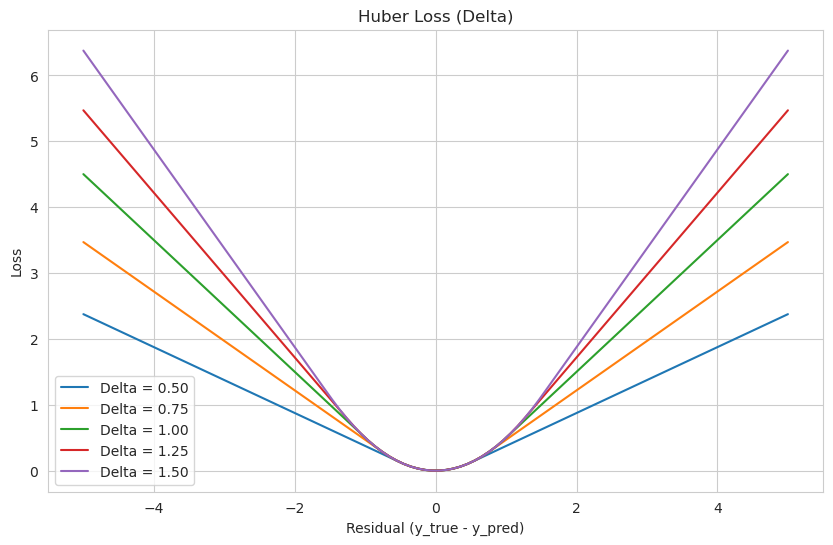

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def huber_loss(y_true, y_pred, delta):
    # Notice, that we need to omit the mean over the residuals that would give us a scalar loss for plotting here!
    # Check out np.where for some more help.

    ### BEGIN SOLUTION
    residual = y_true - y_pred
    abs_residual = np.abs(residual)
    square_residual = np.square(residual)
    return np.where(abs_residual <= delta, 0.5 * square_residual,
                    delta * (abs_residual - 0.5 * delta))
    ### END SOLUTION


y_true = np.linspace(-5, 5, 100)
y_pred = np.zeros(100)

plt.figure(figsize=(10, 6))

for d in np.linspace(0.5, 1.5, num=5):
    loss = huber_loss(y_true, y_pred, d)
    plt.plot(y_true, loss, label=f"Delta = {d:.2f}")

plt.title('Huber Loss (Delta)')
plt.xlabel('Residual (y_true - y_pred)')
plt.ylabel('Loss')
plt.legend()
plt.show()


let us compare the huber loss to the mean absolute error (MAE) and mean squared error (MSE) loss functions.

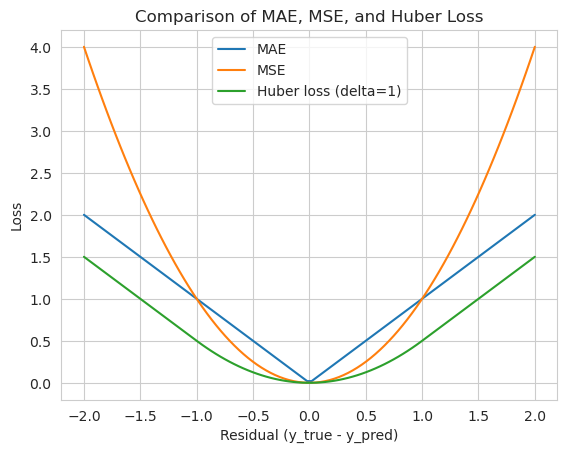

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def mae_loss(y_true, y_pred):
    return np.abs(y_true - y_pred)


def mse_loss(y_true, y_pred):
    return np.square(y_true - y_pred)


y_true = np.linspace(-2, 2, 100)
y_pred = np.zeros(100)

mae = mae_loss(y_true, y_pred)
mse = mse_loss(y_true, y_pred)
huber = huber_loss(y_true, y_pred, delta=1)

plt.plot(y_true, mae, label='MAE')
plt.plot(y_true, mse, label='MSE')
plt.plot(y_true, huber, label='Huber loss (delta=1)')
plt.title('Comparison of MAE, MSE, and Huber Loss')
plt.xlabel('Residual (y_true - y_pred)')
plt.ylabel('Loss')
plt.legend()
plt.show()


We can see that the huber loss acts quadratically for the interval $[-\delta, \delta]$ and approximately linearly for the interval $(-\infty, -\delta]$ and $[\delta, \infty)$. A first neat observation is that the huber loss is continuous, smooth and differentiable (as opposed to MAE), making it a good choice for optimization algorithms. Notice, how the linear part of the huber loss is considerably less steep than the slope of the quadratic function on the same interval. Observations that produce a residual that is larger than $\delta$ are penalized less than observations that produce a residual that is smaller than $\delta$. This is a desirable property, as it makes the huber loss more robust to outliers as opposed to MSE. Notice however, that it also means that the huber loss displayed here is less sensitive to small errors than MSE and MAE. This implies, that it is more difficult to obtain values to become exactly zero.

## Linear Regression with Huberloss (outliers)
Take a look at the below generated synthetic data with outliers.


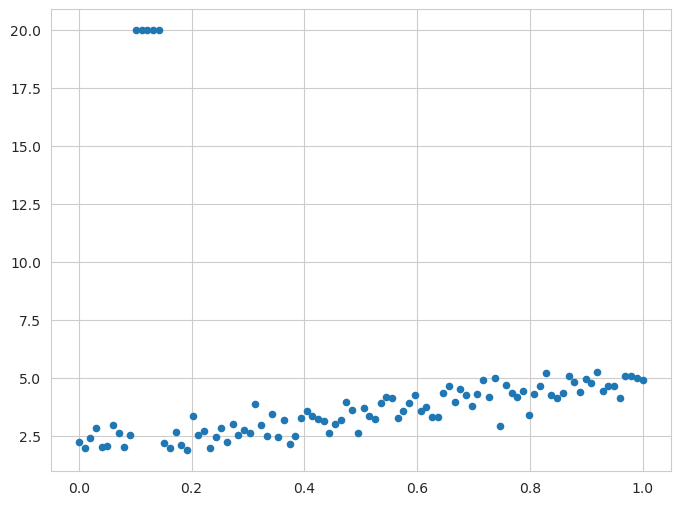

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor

# Generate some synthetic data with outliers
np.random.seed(42)
X_train = np.linspace(0., 1., 100).reshape(-1, 1)
y = X_train * 3 + 2 + np.random.randn(100, 1) * 0.5
y[10:15] = 20  # add some outliers

# generate some test data without outlieres
X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_true = X_test * 3 + 2
y_test = y_true + np.random.randn(100, 1) * 0.5

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y, s=20, label='Training data')

Can you imagine what happened if you applied MSE here? Let's contrast that with the huber loss.
1. Fit a LinearRegression model using the mean squared error loss function on the training data.
2. Fit a HuberRegressor model on the training data.
3. Evaluate both models on the test data using their predicted values.
Eventually plot the training data, the true function, and the predicted values of both models on the test data.

/home/ruhkopf/anaconda3/envs/ds/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


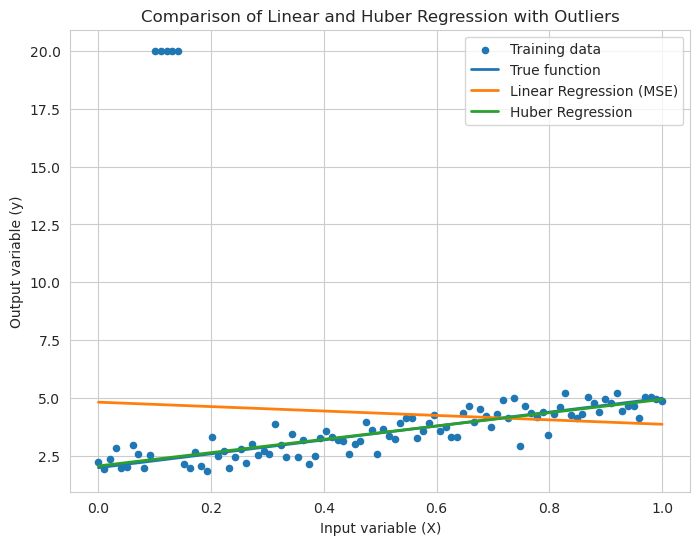

In [4]:
# Fit a LinearRegression model with the MSE loss function
### BEGIN SOLUTION
linreg_mse = LinearRegression()
linreg_mse.fit(X_train, y)
### END SOLUTION

# Fit a HuberRegressor model
### BEGIN SOLUTION
huber = HuberRegressor()
huber.fit(X_train, y)
### END SOLUTION

# Evaluate models on test data
y_pred_linreg_mse = linreg_mse.predict(X_test)
y_pred_huber = huber.predict(X_test)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y, s=20, label='Training data')
plt.plot(X_test, y_true, label='True function', linewidth=2)
plt.plot(X_test, y_pred_linreg_mse, label='Linear Regression (MSE)', linewidth=2)
plt.plot(X_test, y_pred_huber, label='Huber Regression', linewidth=2)
plt.xlabel('Input variable (X)')
plt.ylabel('Output variable (y)')
plt.title('Comparison of Linear and Huber Regression with Outliers')
plt.legend()
plt.show()


We can clearly see, that the MSE loss due to its quadratic penalty for large losses (outliers) is no longer able to fit the data well, if outliers are present. The Huber loss on the other hand is able to fit the data well, even if outliers are present. This is because it is a combination of the MSE loss and the MAE loss.

# Learning Paradigms
Explain the essential differences between regression, classification (both supervised), clustering (unsupervised), semi-supervised, and reinforcement learning methods.




Supervised Learning:
Regression: The objective of regression is to predict a continuous target variable based on input features. The target variable is a numeric value, and the goal of the algorithm is to learn a function that maps input features to the target variable. For example, predicting the price of a house given its size and location is a regression problem.
Classification: The objective of classification is to predict a categorical target variable based on input features. The target variable is a label or a class, and the goal of the algorithm is to learn a function that maps input features to the target class. For example, predicting whether an email is spam or not based on its text is a classification problem.

Unsupervised Learning:
Clustering: The objective of clustering is to group similar data points together. The algorithm does not have a target variable, and the goal is to discover structure in the data. For example, clustering customers based on their purchasing behavior is an unsupervised learning problem.

Semi-Supervised Learning:
Semi-supervised learning is a combination of supervised and unsupervised learning. The objective is to use a small amount of labeled data and a large amount of unlabeled data to improve the performance of the model. This approach is useful when labeling data is expensive or time-consuming.

Self-supervised learning
Self-supervised learning is a type of unsupervised learning where a model is trained on a preliminary task first, which is a task created from the data itself, instead of relying on labeled data. The idea is to use the inherent structure or properties of the data to train a model, which can then be used for downstream tasks that may require labeled data. A common preliminary task in self-supervised learning is to learn to predict a maskedout part of the input from another part, or to reconstruct the input from a corrupted version. By doing so, the model learns a representation of the data that captures the underlying structure and can be useful for other tasks. Self-supervised learning has been shown to be effective in many domains, including natural language processing and computer vision.
A nice blog post for semi-supervised learning is https://www.v7labs.com/blog/semi-supervised-learning-guide it delivers on the main intuition

Reinforcement Learning:
Reinforcement learning is a type of machine learning that focuses on sequential decision-making. The objective is to learn the optimal actions to take in a given environment to maximize a reward. In reinforcement learning, an agent interacts with an environment and learns by trial and error. For example, training a robot to navigate a maze by giving it a reward for reaching the end is a reinforcement learning problem.



let's put some of them to work:
But before we do that -- let us create some dummy classification data (where we know the underlying labels) to play around with.
Use sklearn's make_classification to create some data (n = 1000) and plot it. Notice, how we obtain labeled data, that is somehow "clustered" together in the feature space; that is we have some (manifold) structure in the data


Shape of X: (1000, 2)
Shape of y: (1000,)


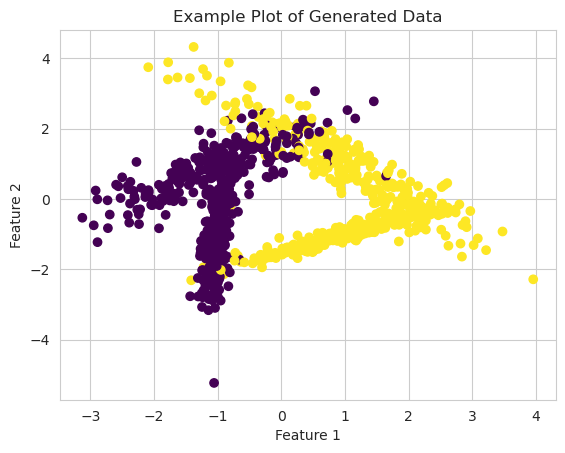

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# define dataset
### BEGIN SOLUTION
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           random_state=100)
### END SOLUTION

# Print the shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Plot the data
### BEGIN SOLUTION
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
### END SOLUTION
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Example Plot of Generated Data')
plt.show()

In [6]:
assert X.shape == (1000, 2)
assert y.shape == (1000,)


## Unsupervised learning: (clustering)
One of the first unsupervised algorithms any data scientist will encounter in his studies is k-means due to its simplicity.
The way this works is

1. Choose the number of clusters, k, that you want to identify.
2. Initialize k cluster centroids randomly.
3. Assign each data point to the nearest centroid based on Euclidean distance.
4. Recalculate the centroid of each cluster as the mean of all data points assigned to it.
5. Repeat steps 3 and 4 until the centroids no longer move significantly or a maximum number of iterations is reached.

Try clustering the dataset with K-means from sklearn.cluster.KMeans.
Choose k to be 2 and see what happens. Explain your findings. Then try k=3. What do you see?

Plot both of your results, including the label that you obtained.

/home/ruhkopf/anaconda3/envs/ds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


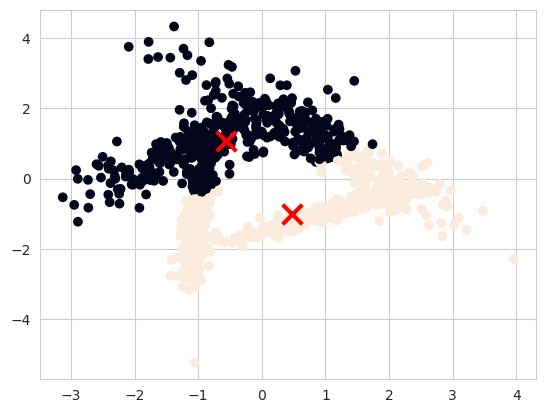

In [7]:
import numpy as np
from sklearn.cluster import KMeans

# Perform K-means clustering with 3 clusters
random_state = np.random.RandomState(20)

### BEGIN SOLUTION
kmeans = KMeans(n_clusters=2,
                random_state=random_state)  # TODO play around with the random state to check out stability of the final clusters
kmeans.fit(X)
### END SOLUTION

# Plot the data points and the centroids of the clusters
### BEGIN SOLUTION
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)  # the actual labels
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200,
            linewidths=3, color='r')

### END SOLUTION
plt.show()


In [8]:
# assert (kmeans.labels_[:3] == np.array([1, 0, 0])).all()
# assert np.allclose(kmeans.cluster_centers_,
#                    np.array([[-0.03977453, -1.02124859],
#  [ 0.06720022,  1.22664283]]))

In [9]:
print(kmeans.cluster_centers_)

[[-0.57015024  1.06537457]
 [ 0.47364841 -1.01625085]]


Given that we randomly started out with two centroids, we have converged to a configuration of these two clusters that looks like the above. We never used any label information, but purely used the distribution of the points and their proximity in the feature space to find structure in the data. It veeery roughly resembles the distribution of ground truth labels. Notice that there is **some resemblence**, but there are quite many points placed in the cluster albeit being of different ground truth labels. The most likely reason for it is that the label-clusters are poorly separated in the feature space and even overlap, giving the simple k-means a hard time. While clustering gives us some **insight into the structure of the data** (feature-space), it need not align with the labels completely. We usually need to look at **multiple** instantiations of clusters (e.g. seeds, k, etc.) to get a better idea of the structure of the data and **stability** of the found clusters. Notice, that the shape the k-means algorithm looks for in the data is something like a **gaussian ball**. This is due to the fact that the algorithm uses the euclidean distance as a measure of similarity. If we were to use a different distance measure, we would obtain different clusters. For example, if we were to use the cosine distance, we would obtain clusters that are more linearly separated.

Notice, that we additionally need a rule for dealing with new observations to obtain a classifier; such as assigning the label of the closest cluster center. This is called the **decision rule**. In the case of k-means, we can simply use the cluster centers as prototypes for the classes and assign the label of the closest cluster center to a new observation. This is called **prototype-based classification**.

What happens if we assume 3 clusters?

In [1]:
# Perform K-means clustering with 3 clusters
### BEGIN SOLUTION
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
### END SOLUTION

# Plot the data points and the centroids of the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200,
            linewidths=3, color='r')
plt.show()


NameError: name 'KMeans' is not defined

Since the algorithm is ignorant of the number of labels and only looks at the feature space, we can initialize three centroids and in turn, after following the instructions, obtain three clusters. Albeit revealing structure in the feature space, there is no resemblance at all with the labels.

## Supervised Learning
In this setting, we do care about the **feature space and how the labels are associated** with it. This time, we directly try to predict the label for unseen datapoints (meaning we didn't use the observation for training). How well our prediction performs on hold-out data tells us how well our model generalizes.

So let us start by splitting the data to a training and a test split.

In [2]:
# https://machinelearningmastery.com/semi-supervised-learning-with-label-propagation/

# evaluate label propagation on the semi-supervised learning dataset
import matplotlib.pyplot as plt
from numpy import concatenate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.semi_supervised import LabelPropagation

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)


NameError: name 'X' is not defined


For our intents and purposes, we will use a Linear Classifier called Logistic regression. It searches for some linear plane in the feature space, that separates the labels at least "confusion" (don't worry about the details here). But crucially, it has a **known label** (=target) that we would like to predict.
Let us predict the labels for our test datapoints and see how accurate we are i.e.

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

where:

$TP$ is the number of true positives (the number of correct predictions of the positive class).
$TN$ is the number of true negatives (the number of correct predictions of the negative class).
$FP$ is the number of false positives (the number of incorrect predictions of the positive class).
$FN$ is the number of false negatives (the number of incorrect predictions of the negative class).
The accuracy is a measure of how well the model predicts the correct class labels for both positive and negative classes. It is calculated as the ratio of the total number of correct predictions to the total number of predictions made by the model.

In [12]:
model0 = LogisticRegression()
model0.fit(X_train, y_train)

# make predictions on hold out test set
yhat = model0.predict(X_test)

# calculate score for test set
score = accuracy_score(y_test, yhat)

# summarize score
print('Accuracy: %.3f' % (score * 100))


Accuracy: 90.600


BONUS: Just a pointer, because we said that the logistic regression is a linear classifier (i.e. searches for a linear separation): In the following plot, we can actually see its decision boundary, i.e. for what (x_1, x_2) values it will predict which label.

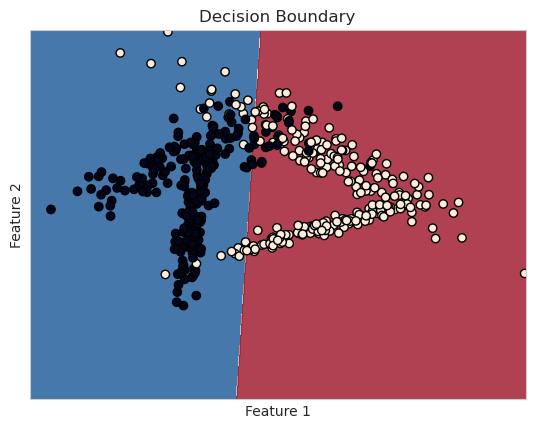

In [13]:
coef = model0.coef_
intercept = model0.intercept_
x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model0.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu_r, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision Boundary')
plt.show()


What we see here is that the model doesn't do a too bad job and already achieved 90% accuracy. The linear plane it lays through the data doesn't look too bad either, but it fails quite some examples.

## Semi-supervised learning



Here, we start in our artificial dataset, by dropping (setting there value to -1) some of the labels of the train set.

In [14]:
# split the train into labeled and unlabeled
X_train_lab, X_train_unlab, y_train_lab, y_train_unlab = train_test_split(
    X_train, y_train,
    test_size=0.97,
    # NOTICE that we only have 3 % of the labels left!
    random_state=42,
    stratify=y_train
)
# create the training dataset input
X_train_mixed = concatenate((X_train_lab, X_train_unlab))
# create "no label" for unlabeled data
nolabel = np.ones_like(y_train_unlab) * -1
# recombine training dataset labels
y_train_mixed = concatenate((y_train_lab, nolabel))

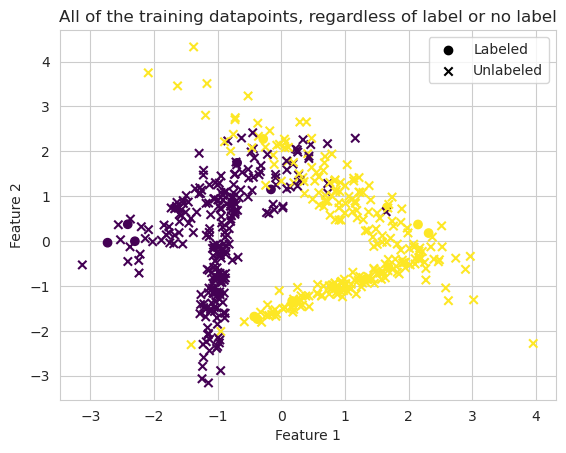

In [15]:

# Plot the labeled data
plt.scatter(X_train_lab[:, 0], X_train_lab[:, 1], c=y_train_lab, cmap='viridis', label='Labeled')

# Plot the unlabeled data
plt.scatter(X_train_unlab[:, 0], X_train_unlab[:, 1], c=y_train_unlab, cmap='viridis', marker='x',
            label='Unlabeled')

# Set the axis labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('All of the training datapoints, regardless of label or no label')

# Add a legend with the correct markers
plt.legend(handles=[plt.scatter([], [], marker='o', color='black', label='Labeled'),
                    plt.scatter([], [], marker='x', color='black', label='Unlabeled')],
           ncol=1, loc='best')

plt.show()

Let us first try again our linear classifier on the fewer data (only those left!). What do you expect regarding the accuracy and why?

In [16]:
model1 = LogisticRegression()
model1.fit(X_train_lab, y_train_lab)

# make predictions on hold out test set
yhat = model1.predict(X_test)

# calculate score for test set
score = accuracy_score(y_test, yhat)

# summarize score
print('Accuracy: %.3f' % (score * 100))

Accuracy: 84.600


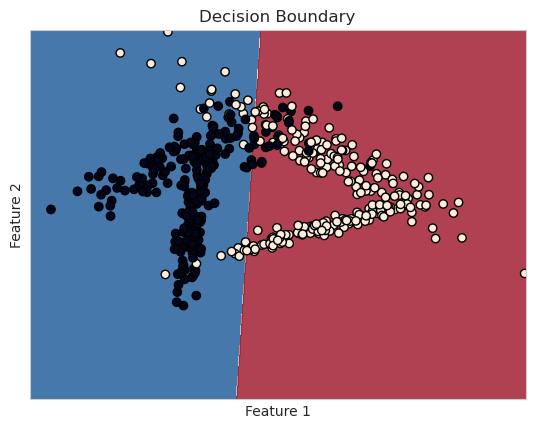

In [17]:
coef = model1.coef_
intercept = model1.intercept_
x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model0.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu_r, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision Boundary')
plt.show()

Given that we have considerably fewer data, it is reasonable (albeit not guaranteed) that we are likely seeing a worse accuracy, because we know less about our data.

The question is, can we improve? Given that we actually have the same amount of datapoints - only we don't know all the labels. Can the structure of the data maybe help us find a better linear separation?
We could exploit the **assumption, that observations that are close in feature space are more likely to exhibit the same label**.

Following this intuition, we can use the  **Label Propagation**  algorithm which creates a  graph that connects all examples (rows) in the dataset based on their respective distance, such as Euclidean distance. Given that not all nodes have a label, we can do random walks from the labeled nodes and propagate their label to another node based on the share of neighbours for the unlabeled node that have the this label. Notice, that the graph already encodes similarity in the featurespace. We do not really care for the details of this algorithm. However, given this unsupervised technique, we can "infer" the missing labels based on the structure of the feature space and our locality assumption of the labels. Given that we have seen that this assumption is true for most of the (ground truth) data, the infered data may help increase our accuracy and stabilize the model. What a neat trick right?

In [18]:
unsupervised_model = LabelPropagation()

# fit model on training dataset (propagate the labels only)
unsupervised_model.fit(X_train_mixed, y_train_mixed)

# Notice, that this algorithm can also deal with unseen data points and predict their class labels in a similar manner.
# with that we already have a classifier.
score = accuracy_score(y_test, unsupervised_model.predict(X_test))

print('Accuracy: %.3f' % (score * 100))


Accuracy: 94.800


The high accuracy of this unsupervised model (yet again notice, that these models are not made to predict for new observations in general!) tells us - what we already intuitively have seen - that the feature space structure is well aligned with the label distribution in most parts of the feature space. Notice, that the labelpropagation algorithm also provides a decision rule on its own, but we will use it here mostly as a means of filling up the labels for the training data of our supervised model to improve its accuracy.

In [19]:
# get labels based on label propagation for entire training dataset data (including those we know already!)
tran_labels = unsupervised_model.transduction_
tran_labels

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,

If we then use the filled up labels to train our logistic regression model, we hopefully can be more confident about the separation:

In [20]:
# define supervised learning model
model2 = LogisticRegression()

# fit supervised learning model on "filled" training dataset including the labels that we obtained from the unsupervised method, relying on the feature space structure.
model2.fit(X_train_mixed, tran_labels)

# make predictions on hold out test set
yhat = model2.predict(X_test)

# calculate score for test set
score = accuracy_score(y_test, yhat)

print('Accuracy: %.3f' % (score * 100))


Accuracy: 90.600


Indeed, we did improve the accuracy of the logistic regression  from 84.6 to 90.6 because our additional assumption actually mostly holds and we therefore gain more information about our classification problem. But apparently, we could do even better if we did not use such a rigid linear separation.

# (B) Classification
In the previous section, we have been looking mostly at what parts of data are used in the different learning paradigms. We have been looking at it from the perspective of classification (which mostly educative). In the following we will more closely examine what most natively is considered classification; the supervised setting, where we have a set of features and a set of labels and we want to learn a function that maps the features to the labels. Let's start by getting some data; in this case, we will use the breast cancer dataset from sklearn. It contains measurements and whether the tumor was malignant or benign (label).


In [1]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split


In [22]:
# data = sklearn.datasets.load_breast_cancer()

# dump the data
# with open('data.pickle', 'wb') as f:
#     pickle.dump(data, f)

# load the data
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)

# data is actually a dictionnary
print(data.keys())
print(data.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [23]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
# Define our features/target
X = df[["mean radius"]]
# Target data['target'] = 0 is malignant, 1 is benign
Y = (data.target == 0)

In [25]:
# Create a 75-25 train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print(f"Training Data Size: {len(x_train)}")
print(f"Test Data Size: {len(x_test)}")

Training Data Size: 426
Test Data Size: 143


##  Classification Metrics & Logistic Regression
### Question 1a fit a logistic regression model to the training data

Let's first fit a logistic regression model using the training set.

For this problem, we will use the existing `LogisticRegression` implementation in sklearn.

Fill in the code below to compute the training and testing accuracy, defined as:

$$
\text{Accuracy} = \frac{1}{n} \sum_{i} {\mathbb{1}_{y_i == \hat{y_i}}}
$$


where $\hat{y_i}$ is the prediction of our model, $y_i$ the true value, and $\mathbb{1}_{y_i == \hat{y_i}}$ an indicator function where $\mathbb{1}_{y_i == \hat{y_i}} = 1$ if ${y_i} = \hat{y_i}$, and $\mathbb{1}_{y_i == \hat{y_i}} = 0$ if ${y_i} \neq \hat{y_i}$

In other words, the accuracy is defined as $$accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{\text{true positives} + \text{true negatives}}{\text{true positives} + \text{true negatives} + \text{false positives} + \text{false negatives}}$$
 which is the share in the total number of correct predictions (main diagonal of the confusion matrix).

<!--
BEGIN QUESTION
name: q1
-->

In [3]:
lr = sklearn.linear_model.LogisticRegression(fit_intercept=True, solver='lbfgs',
                                             C=1.)  # look a hyperparameter :)

lr.fit(x_train, y_train)

train_accuracy = np.mean(y_train == lr.predict(x_train))
test_accuracy = np.mean(y_test == lr.predict(x_test))

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

NameError: name 'x_train' is not defined

### Question 1b Precision & Recall
It seems we can get a very high test accuracy. How about precision and recall?
- Precision (also called positive predictive value) is the fraction of true positives among the total number of data points predicted as positive.  $$precision = \frac{\text{true positives}}{\text{true positives} + \text{false positives}}$$ The frame of reference is always the positives i.e. our classification result.
- Recall (also known as sensitivity) is the fraction of true positives among the total number of data points with positive labels. $$recall = \frac{\text{true positives}}{\text{true positives} + \text{false negatives}}$$ The frame of reference is the ground truth (truth and false values) and good we are in categorizing the data correctly. To be a bit more precise:

**Precision measures the ability of our classifier to not predict negative samples as positive, while recall is the ability of the classifier to find all the positive samples.**

Below is a graphical illustration of precision and recall:
![precision_recall](precision_recall.png)


To understand the link between precision and recall, it's useful to create a confusion matrix of our predictions. Luckily, `sklearn.metrics` provides us with such a function!


In [27]:
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Plot the confusion matrix (cm) with the classes specified by classes.
    Normalization can be applied by setting `normalize=True`.

    Arguments:
        cm (array): the confusion matrix
        classes (array): the class labels
        normalize (bool): whether to normalize the confusion matrix
        title (str): the title of the plot
        cmap (matplotlib colormap): the colormap to use
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




Confusion matrix, without normalization
[[85  4]
 [ 9 45]]
Normalized confusion matrix
[[0.95505618 0.04494382]
 [0.16666667 0.83333333]]


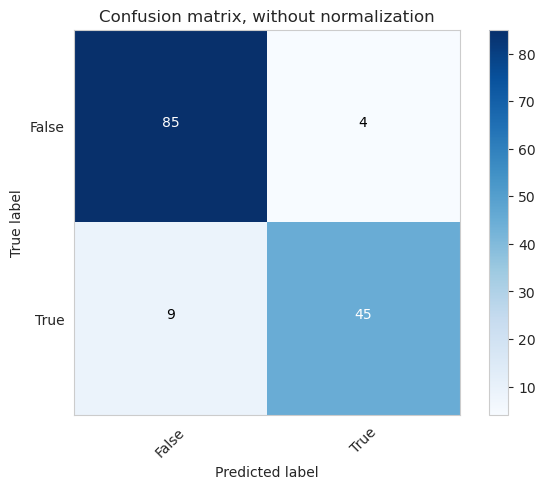

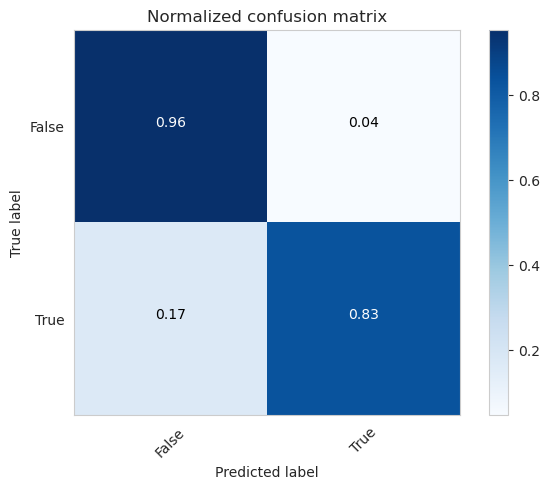

In [28]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, lr.predict(x_test))

class_names = ['False', 'True']
# Plot non-normalized confusion matrix
plt.figure()
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

Now let's compute the precision and recall for the test set using the model we got from Question 1.

**Do not** use `sklearn.metrics` for this computation.

<!--
BEGIN QUESTION
name: q2
-->

In [29]:
def confusion_components(y_test, y_pred):
    ### BEGIN SOLUTION
    TP = sum(np.logical_and(y_pred == 1, y_test == 1))
    TN = sum(np.logical_and(y_pred == 0, y_test == 0))
    FN = sum(np.logical_and(y_pred == 0, y_test == 1))
    FP = sum(np.logical_and(y_pred == 1, y_test == 0))
    ### END SOLUTION
    return TP, TN, FN, FP


def precision(y_pred, y_test):
    ### BEGIN SOLUTION
    TP, TN, FN, FP = confusion_components(y_test, y_pred)
    prec = TP / (TP + FP)
    ### END SOLUTION
    return prec


def recall(y_pred, y_test):
    ### BEGIN SOLUTION
    TP, TN, FN, FP = confusion_components(y_test, y_pred)
    rec = TP / (TP + FN)
    ### END SOLUTION
    return rec

In [30]:
assert confusion_components(y_test, lr.predict(x_test)) == (45, 85, 9, 4)
assert np.allclose(precision(lr.predict(x_test), y_test), 0.9183673469387755)
assert np.allclose(recall(lr.predict(x_test), y_test), 0.8333333333333334)

In [31]:
print(f"Precision: {precision(lr.predict(x_test), y_test):.4f}")
print(f"Recall: {recall(lr.predict(x_test), y_test):.4f}")

Precision: 0.9184
Recall: 0.8333


Our precision is fairly high while our recall is a bit lower. Why might we observe these results? Please consider the following plots,
 which display the distribution of the target variable in the training and testing sets.

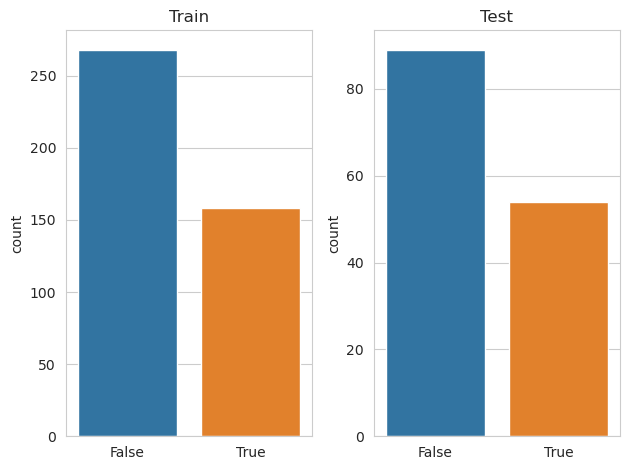

In [32]:
def plot_train_test_counts(y_train, y_test):
    """
    This function plots the distribution of the target variable in the training and testing sets.
    """
    fig, axes = plt.subplots(1, 2)
    sns.countplot(x=y_train, ax=axes[0])
    sns.countplot(x=y_test, ax=axes[1])
    axes[0].set_title('Train')
    axes[1].set_title('Test')
    plt.tight_layout()


plot_train_test_counts(y_train, y_test)


The True and False classes are imbalanced, which can boost the precision of our model. Consider, that $r = \frac{P}{N}$ with P being the Positives, N the negatives and $TPR = \frac{P}{P+N}$ the share in positives. Similarily, we can define $FPR=\frac{FP}{FP + TN}$. Then we can actually see that the precision is
$$precision = \frac{TP}{TP+FP} = \frac{P * TPR}{P * TPR + N * FPR} = \frac{TPR}{TPR + \frac{1}{r} FPR}$$.

Notably, the $\frac{1}{r}$ comes about when dividing by P. Notice in particular the precision's  dependence on r i.e. the share in TRUE vs FALSE available in the dataset. Increasing r by means of e.g. having a larger number of TRUE samples in the dataset, increases the precision - as it reduces the weight of the false positve rate (FPR). (for more details on this visit [this page](https://direct.mit.edu/neco/article/33/4/853/97475/The-Effect-of-Class-Imbalance-on-Precision-Recall))

$$recall = \frac{TP}{TP+FN} = \frac{P * TPR}{P * TPR + N * FNR} = \frac{TPR}{TPR + \frac{1}{r} FNR}$$.

A broader view on how imbalance of classes affects these metrics and when to use which of them [is discussed here](https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba)

###  Question 3 Cross Entropy Loss of our logistic regression
Now let's try to analyze the cross entropy loss from our logistic regression. The average loss across our entire dataset is:

$R(\theta) = -\frac{1}{n} \sum_{i=1}^n \left( y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i})  \right) $

where $\hat{y_i} = \sigma(x_i^T \theta)$ from our logistic model. Here, $x_i$ is the i'th row of our design matrix $X$, $\theta$ is our
 weight vector $[\theta_1, \theta_2]^T$ where $\theta_2$ corresponds to the weight for the mean radius feature
 and $\theta_1$ corresponds to the bias term, and $\sigma$ is the sigmoid activation function defined below:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

**Note**: In this class, when performing linear algebra operations we
interpret both rows and columns as column vectors. So if we wish to calculate
 the dot product between row $x_i$ and a vector $v$, we would write $x_i^Tv$.

Now  collect the coefficients from our logistic regression model and store them in a variable called theta.
Create the design matrix accordingly. Be mindfull of the shapes!

In [33]:
### BEGIN SOLUTION
theta = np.array([[lr.intercept_[0]], [lr.coef_[0][0]]])
### END SOLUTION

### BEGIN SOLUTION
X_new = np.hstack(
    [np.ones([len(X), 1]), X])  # This is adding a coefficient of 1 for the intercept term
### END SOLUTION

print('theta:', theta, '\n')
print('X_new:', X_new)


theta: [[-13.75289919]
 [  0.92881284]] 

X_new: [[ 1.   17.99]
 [ 1.   20.57]
 [ 1.   19.69]
 ...
 [ 1.   16.6 ]
 [ 1.   20.6 ]
 [ 1.    7.76]]


In [34]:
# as a sanity check :
X_new @ theta  # is a valid operation

array([[ 2.95644378e+00],
       [ 5.35278090e+00],
       [ 4.53542560e+00],
       [-3.14585657e+00],
       [ 5.09271331e+00],
       [-2.18917935e+00],
       [ 3.19793512e+00],
       [-1.01887517e+00],
       [-1.67833229e+00],
       [-2.17989122e+00],
       [ 1.12668249e+00],
       [ 9.03767405e-01],
       [ 4.05244293e+00],
       [ 9.68784303e-01],
       [-1.00029892e+00],
       [-2.47960516e-01],
       [-1.17926718e-01],
       [ 1.22885190e+00],
       [ 4.64688315e+00],
       [-1.17677335e+00],
       [-1.60402726e+00],
       [-4.92546197e+00],
       [ 4.95089756e-01],
       [ 5.90078048e+00],
       [ 1.71183457e+00],
       [ 2.16695287e+00],
       [-2.10808002e-01],
       [ 3.53230774e+00],
       [ 4.57937242e-01],
       [ 2.56634239e+00],
       [ 3.55088400e+00],
       [-2.75575518e+00],
       [ 2.05549532e+00],
       [ 4.14532421e+00],
       [ 1.22885190e+00],
       [ 1.79542773e+00],
       [-5.17316239e-01],
       [-1.65046790e+00],
       [ 1.7

In [35]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))


def lr_loss(theta, X, Y):
    '''
    Compute the cross entropy loss for our logistic regression using X, Y, and theta. You should not need to use a for loop.
    Hint: The notation B @ v means: compute the matrix multiplication Bv.

    Args:
        theta: The model parameters.
        X: The design matrix
        Y: The label vector, 1 indicating True, 0 indicating False.

    Return:
        The cross entropy loss.
    '''
    ### BEGIN SOLUTION
    y_hat = sigmoid(X @ theta)
    return - np.mean(Y * np.log(y_hat) + (1 - Y) * np.log(1 - y_hat))
    ### END SOLUTION


lr_loss(theta, X_new, Y)


1.4455063977110025

In [36]:
assert np.allclose(lr_loss(theta, X_new, Y), 1.4455063977110025)

Let's check the output of our model, which now is both a classification and the probability of falling into the respective class.

In [37]:
Y = (data.target == 0)

x_train, x_test, y_train, y_test = train_test_split(df[['mean radius']], Y, test_size=0.25,
                                                    random_state=42)

lr = sklearn.linear_model.LogisticRegression(fit_intercept=True, solver='lbfgs', C=1.)
lr.fit(x_train, y_train)

print('coeffnicents\n', lr.intercept_, lr.coef_)

y_hat = lr.predict(x_test)
probs = lr.predict_proba(x_test)

print('\ny_hat:\n', y_hat[:10])
print('\nprobs:\n', probs[:10, :])


coeffnicents
 [-13.75289919] [[0.92881284]]

y_hat:
 [False  True  True False False  True  True  True False False]

probs:
 [[0.89757842 0.10242158]
 [0.02106575 0.97893425]
 [0.35284721 0.64715279]
 [0.90340291 0.09659709]
 [0.95410419 0.04589581]
 [0.00458374 0.99541626]
 [0.0012414  0.9987586 ]
 [0.07133623 0.92866377]
 [0.79617154 0.20382846]
 [0.6989706  0.3010294 ]]


Here we plot the probability for each example from the logistic regression model's perspective, given the observation's mean radius value.

<Axes: xlabel='mean radius', ylabel='y'>

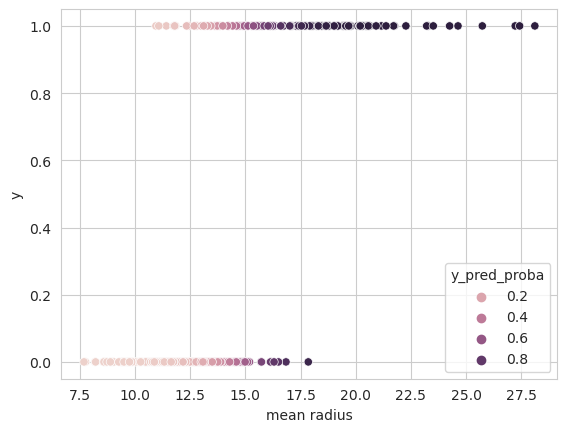

In [38]:
sns.scatterplot(
    data=pd.concat([x_train,
                    pd.Series(y_train, name='y', index=x_train.index),
                    pd.Series(lr.predict_proba(x_train)[:, 1], name='y_pred_proba',
                              index=x_train.index)], axis=1)
    ,
    x='mean radius', y='y', hue='y_pred_proba')

Similarily, we can plot what the logistic regression model predicts as class label

<Axes: xlabel='mean radius', ylabel='y'>

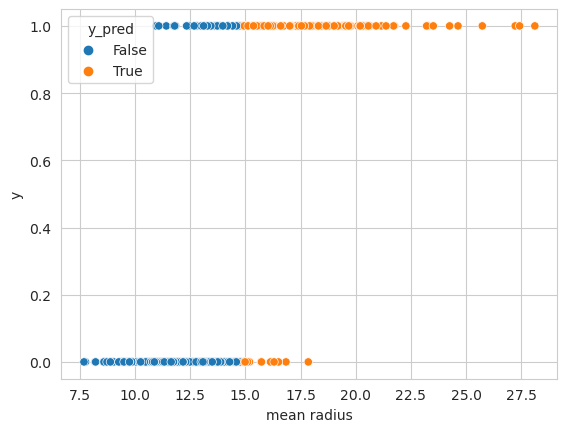

In [39]:
sns.scatterplot(
    data=pd.concat([x_train,
                    pd.Series(y_train, name='y', index=x_train.index),
                    pd.Series(lr.predict(x_train), name='y_pred',
                              index=x_train.index)], axis=1)
    ,
    x='mean radius', y='y', hue='y_pred')

But how did the classification result y_hat come about if we only ever had the probability of falling into a class?
(which is what the logistic regression model predicts  $\hat{y_i} = \sigma(x_i^T \theta) = P(y_i=1|x_i, \theta) \in [0,1]$
$P(y_i=0|x_i, \theta) = 1 - P(y_i=1|x_i, \theta)$
accordingly)


Well,  the model used a threshold (t=0.5) on the predicted probability to decide whether to predict 1 or 0 (decision rule). Meaning if $p(x_i'\theta) > 0.5$ then $y_i = 1$ else $y_i = 0$.

Write a predict method, that given a threshold t, returns the predicted class for a given probability p.

In [40]:
def predict(p, t=0.5):
    '''
    Predict the class given a probability p and a threshold t.
    Args:
        p: The probability of the positive class.
        t: The threshold.
    Return:
        The predicted class.
    '''
    ### BEGIN SOLUTION
    return (p > t).astype(int)
    ### END SOLUTION

In [41]:
predict(lr.predict_proba(X)[:, 1], t=0.5)

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

Now let us have a look how changing this threshold affects the classification result; in particular the confusion matrix.

Confusion matrix, without normalization
[[85  4]
 [ 9 45]]
Confusion matrix, without normalization
[[89  0]
 [24 30]]
precision of t=0.5: 0.8333333333333334
precision of t=0.9: 0.5555555555555556
recall of t=0.5: 0.9183673469387755
recall of t=0.9: 1.0


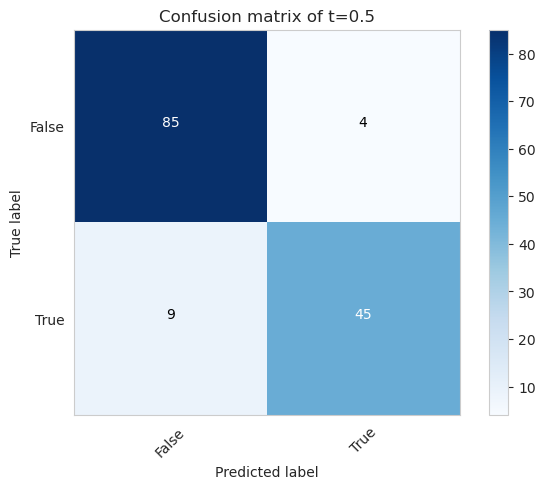

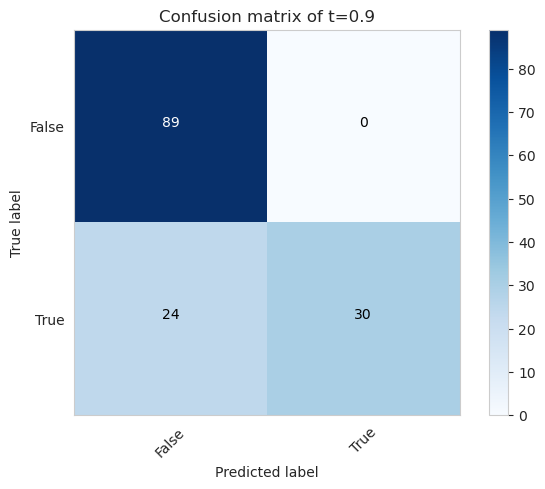

In [42]:
plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_test, predict(probs[:, 1], t=0.5)), classes=class_names,
                      normalize=False,
                      title='Confusion matrix of t=0.5')

plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_test, predict(probs[:, 1], t=0.9)), classes=class_names,
                      normalize=False,
                      title='Confusion matrix of t=0.9')

print(f'precision of t=0.5: {precision(y_test, predict(probs[:, 1], t=0.5))}')
print(f'precision of t=0.9: {precision(y_test, predict(probs[:, 1], t=0.9))}')

print(f'recall of t=0.5: {recall(y_test, predict(probs[:, 1], t=0.5))}')
print(f'recall of t=0.9: {recall(y_test, predict(probs[:, 1], t=0.9))}')

### BEGIN SOLUTION

Changing the threshold redistributes the TP TN FP FN in the confusion matrix. In this case, the precision drops and the recall increases. Notice, that this increase in our threshold makes us more conservative and less likely to predict the positive class, which means that the TP will decrease, while the TN will increase.

Remember, the definition of the precision is: $\frac{TP}{TP + FP}$ and the definition of the recall is: $\frac{TP}{TP + FN}$

So this will lead to the following changes:

Precision: Precision is the proportion of positive predictions that are correct. As you increase the threshold, the model becomes more conservative, and the number of true positives decreases, which in turn, decreases the number of false positives (FP). This means that the precision will increase.

Recall: Recall is the proportion of actual positives that are correctly predicted. As you increase the threshold, the model becomes more conservative, and the number of true positives decreases, which in turn, increases the number of false negatives (FN). This means that the recall will decrease.


### END SOLUTION

## Recap Logistic Regression

We formulated our model like this:   $P(Y=1|X, \theta) =  p   = \sigma(X\theta) =  \hat{Y}$.
We know that in our case this is $P(Y=1|x) = p= \sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2)$
where
$p = \sigma(t) = \frac{1}{1 + e^{-t}} = \frac{e^{t}}{e^{t}} * \frac{1}{1 + e^{-t}} = \frac{e^{t}}{1 + e^t}$
 is the logistic function.

This effectively means that the log odds; i.e.$\log\left(\frac{p}{1-p}\right)$ are linear:
To see this start by inverting $p   = \sigma(x_i^T \theta)$:
$\sigma^{-1}(p) = X \theta$ = t,
from the lecture we know that the log odds are:
 $\sigma^{-1}(p) = log\left(\frac{p}{1 - p}\right)$.

Notice, that the log-odds are therefore a linear (combination) function of the input features $X\theta$ - which is why
logistic regression is referred to as a linear classifier. It is linear in the input features.




## Decision Boundary

We have seen in the previous section, that if we set a threshold on the probability, we obtain a classifier from a model that predict probabilities.
Given such a threshold and our model's function for the probability, we can also look at how a change in the feature space changes our prediction.
Enter, the decision boundary (in the feature space).

Let us - for visual purposes extend our model to two dimensions, including the mean radius and mean texture as features.



In [43]:
# Define our features/target
X = df[["mean radius", 'mean texture']]
# Target data['target'] = 0 is malignant, 1 is benign
Y = (data.target == 0)

# Create a 75-25 train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
lr.fit(x_train, y_train)
;

''

<Axes: xlabel='mean radius', ylabel='mean texture'>

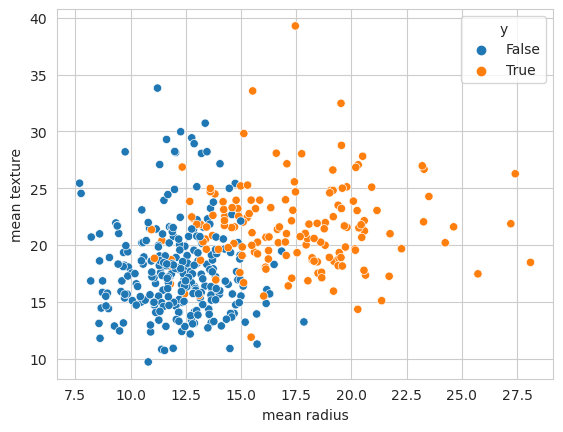

In [44]:
# just to get the boundaries of the plot
x1_min = x_train['mean radius'].min()
x1_max = x_train['mean radius'].max()

# generate the "support data" for our decision boundary
x1 = np.arange(x1_min, x1_max, 1.)

# plot the ground truth data
sns.scatterplot(
    data=pd.concat([x_train, pd.Series(y_train, name='y', index=x_train.index)], axis=1),
    x='mean radius', y='mean texture', hue='y')



Let's assume we had a fixed value t and wanted to get the value for $x_2 | t = log\left(\frac{p}{1-p}\right)$ (implying a fixed $p$)
For a fixed value of t, derive the decision boundary function $g: x_1 \rightarrow x_2$

Derive this function and code it up below.


### BEGIN SOLUTION

$$\sigma^{-1}(p) = log\left(\frac{p}{1 - p}\right) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $$
$$ \frac{log\left(\frac{p}{1 - p}\right) - \theta_0}{\theta_2} - \frac{\theta_1}{\theta_2} x1 = x2 $$
 
### END SOLUTION

In [45]:
def decision_boundary(x1, theta0, theta1, theta2, p):
    """
    given these values, calculate the value of x2
    \simga(t) = \frac{1}{1 + e^{-t}} = P(Y=1| x1, x2) , where t = X\theta, results in
    \sigma^-1(p) = log(p/(1-p)) = X\theta

    of which we can derive its decision boundary iff we fix the value p:
    :param p threshold for the decision boundary
    """
    ### BEGIN SOLUTION
    constant = (np.log(p / (1 - p)) - theta0) / theta2
    return constant - x1 * theta1 / theta2
    ### END SOLUTION

In [46]:
from functools import partial

# we make this a partial function, such that we can pass any x1 value in here and get the corresponding x2 value on the decision boundary for the p = 0.5 threshold.
f_x2 = partial(decision_boundary, theta0=lr.intercept_, theta1=lr.coef_[0][0],
               theta2=lr.coef_[0][1], p=.5)

Let's plot the decision boundary for the model with a fixed threshold of 0.5. Give it a try and see what happens when you change the threshold.

<Axes: xlabel='x', ylabel='y'>

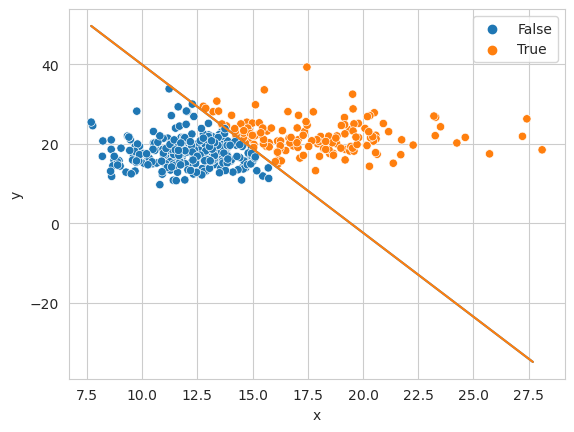

In [47]:

# get the decision boundary values for the plot
x2 = f_x2(np.arange(x1_min, x1_max, 1.))

# plot the decision boundary
sns.lineplot(data=pd.DataFrame({'x': x1, 'y': x2}), x='x', y='y')

# Prediction of logistic regression.
sns.scatterplot(
    data=pd.concat([x_train,
                    pd.Series(y_train, name='y', index=x_train.index),
                    pd.Series(lr.predict(x_train), name='y_pred', index=x_train.index)], axis=1),
    x='mean radius', y='mean texture', hue='y_pred')
sns.lineplot(data=pd.DataFrame({'x': x1, 'y': x2}), x='x', y='y')

Indeed the logistic function uses this threshold (as default in sklearn) to determine the class predictions.

We might just as well plot the probability of falling into class 1 (Y=1) based on our model as a function of the features.

<Axes: xlabel='mean radius', ylabel='mean texture'>

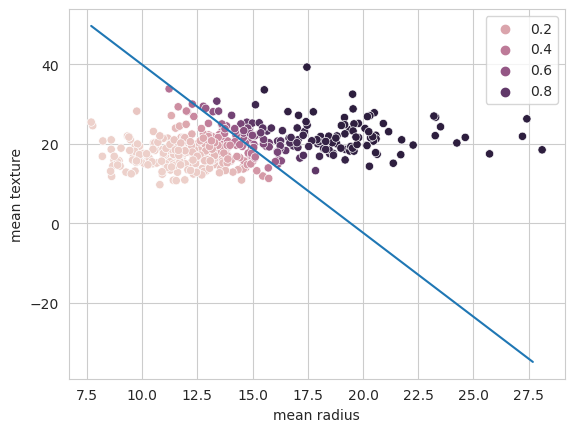

In [48]:
sns.scatterplot(
    data=pd.concat([x_train,
                    pd.Series(y_train, name='y', index=x_train.index),
                    pd.Series(lr.predict_proba(x_train)[:, 1], name='y_pred_proba',
                              index=x_train.index)], axis=1)
    ,
    x='mean radius', y='mean texture', hue='y_pred_proba')
sns.lineplot(data=pd.DataFrame({'x': x1, 'y': x2}), x='x', y='y')

## BONUS: plot the 2d sigmoid function

We just saw how the decision boundary is determined by the logistic function. In particular how it is effectively parametrized by the threshold $t$ and the coefficients.
The above plot already gives us an idea about the estimated logistiic function. Let's plot the logistic function more explicitly for all possible feature values and notice how the level sets of the function are the decision boundaries.

In [49]:

def plot_sigmoid2d(x1, x2, y, labels, parametrized_sigmoid):
    """
    plot the sigmoid function for 2d logistic regression on a grid
    """
    x1_min = x1.min()
    x1_max = x1.max()
    x2_min = x2.min()
    x2_max = x2.max()
    x1_g = np.arange(x1_min, x1_max, 1.)
    x2_g = np.arange(x2_min, x2_max, 1.)
    x1_g, x2_g = np.meshgrid(x1_g, x2_g)
    z = parametrized_sigmoid(x1_g, x2_g)
    plt.contourf(x1_g, x2_g, z, alpha=0.3)
    plt.colorbar()
    plt.scatter(x1, x2, c=y, alpha=0.5, cmap='RdBu')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title('Sigmoid function')
    plt.show()


Logistic regression coefficients: [-18.40984547   0.94708441   0.22415136]


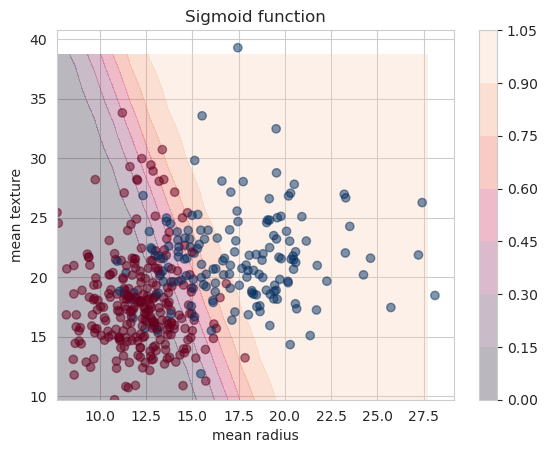

In [50]:
print('Logistic regression coefficients:', np.append(lr.intercept_, *lr.coef_))

### BEGIN SOLUTION
lr_sigmoid = lambda x1, x2: sigmoid(lr.intercept_ + lr.coef_[0][0] * x1 + lr.coef_[0][1] * x2)
### END SOLUTION

plot_sigmoid2d(x1=x_train['mean radius'], x2=x_train['mean texture'], y=y_train,
               labels=['mean radius', 'mean texture'], parametrized_sigmoid=lr_sigmoid)

### BEGIN SOLUTION
When we are concerned with the distribution of our confusion matrix - e.g. we have a very sensitive task, such as classifying whether a cancer is benign or not. A TP / FP might have very different implications, so we might want our decision to be biased towards a certain class, since the cost of misclassification is asymmetric. This makes the decision more aggressive or conservative towards one class than the other. Choosing a different threshold allows us to do this. But how to set
### END SOLUTION